# 0. Setup

In [638]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

In [639]:
#loading the dataset
path = "/Users/ania/Documents/bu/semester 5/Modeling Bus Decisions/Group Project/housePrices.csv"
price = pd.read_csv(path)

In [640]:
#DEFINING USEFUL FUNCTIONS

#calculate correlations of a target var with a list of other vars
def corrs(target, vars, df):
    #correlation matrix for specified vars 
    matrix = df[vars + [target]].corr()
    
    #filtering corrs w/ target, sort by highest at the top
    filtered = matrix[target].abs().sort_values(ascending = False)

    #return filtered correlations
    return filtered



#calculate R2s or p-values of a target var with a list of other vars
def reg_stats(vars, value, target = 'SalePrice', df = price):
    #array to store vars and their respective statistics
    results = []
    
    for var in vars:
        #create regression formuala depending on var type
        if var in (ordinal + nominal):    
            formula = f"{target} ~ C({var})" #categorical
        else:    
            formula = f"{target} ~ {var}" #numerical

        #fit model
        model = smf.ols(formula, data = df).fit()

        #depending on the requested statistic ('R2' or 'p'), store the relevant value
        if value == 'R2':
            results.append((var, model.rsquared_adj))
        elif value == 'p':
            results.append((var, model.pvalues[1]))

    #convert list of results to data frame
    results_table = pd.DataFrame(results, columns = ["Variable", value])

    #return sorted dataframe
    return results_table.sort_values(by = value, ascending = False)



#plotting several variables at once
def plots(rows, cols, size, title, df, vars, type, target = 'SalePrice'):
    #create a figure with a grid of subplots
    fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = size)
    fig.suptitle(title, fontsize = 18, y = 0.9)

    #iterate over the variables and corresponding axes
    for var, ax in zip(vars, axs.ravel()):
        
        #create different types of plots based on the 'type' parameter
        if type == 'hist':
            df[var].plot(kind = 'hist', ax = ax)
        elif type == 'bar':
            df[var].value_counts().plot(kind = 'bar', ax = ax)
        elif type == 'scatter':
           sns.regplot(x = var, y = target, data = df, ax = ax, line_kws = {'color' : 'red'})
        elif type == 'box':
            sns.boxplot(y = var, x = target, orient = 'h', data = df, ax = ax)
            ax.set(xticklabels = [])

        #set title and labels
        ax.set_title(var)
        ax.set_xlabel("")
        ax.set_ylabel("")

    #display the plots
    plt.show()

# 1. Data Description

## 1.1 Data Structure

In [643]:
#inspect first 5 rows
price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [644]:
#summarize vars and data types
price.info()

#about half of the variables are categorical
#will need to convert variables for linear regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [645]:
#quantify rows and columns
price.shape

#81 variables
#1460 observations

(1460, 81)

In [646]:
#variables with an inherent order
ordinal = [
    'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 
    'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 
    'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'
]

#categorical variables without a specific order
nominal = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
    'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition', 
    'MoSold'
]

#countable quantities
discrete = [
    'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
    'GarageCars', 'YrSold',
]

#variables that can take any value in a range
continuous = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea',
    'MiscVal'
]

cat = ordinal + nominal
num = continuous + discrete
all = cat + num

#ignore ID, SalePrice
#NOTE: this is my interpretation, but some vars are ambiguous

In [647]:
#variable types summary
print(f'DEPENDENT Variable: SalePrice') 

print(f'\nCATEGORICAL Variables: {len(cat)}') 
print(f'Ordinal Variables: {len(ordinal)}') 
print(f'Nominal Variables: {len(nominal)}') 

print(f'\nNUMERICAL Variables: {len(num)}') 
print(f'Discrete Variables: {len(discrete)}') 
print(f'Continuous Variables: {len(continuous)}') 

print(f'\nTOTAL INDEPENDENT Variables: {len(all)}') 

DEPENDENT Variable: SalePrice

CATEGORICAL Variables: 47
Ordinal Variables: 23
Nominal Variables: 24

NUMERICAL Variables: 32
Discrete Variables: 13
Continuous Variables: 19

TOTAL INDEPENDENT Variables: 79


In [648]:
#identify vars with lots of missing values
null_counts = price.isnull().sum()
null_counts[null_counts > 0]

#lots of missing values, probably missing not at random

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [649]:
#renaming columns to avoid errors in regression
price.rename(columns = {'1stFlrSF':'FirstFlrSF', 
                        '2ndFlrSF':'SecondFlrSF', 
                        '3SsnPorch':'ThreeSsnPorch'}, inplace = True)

## 1.2 Price Distribution

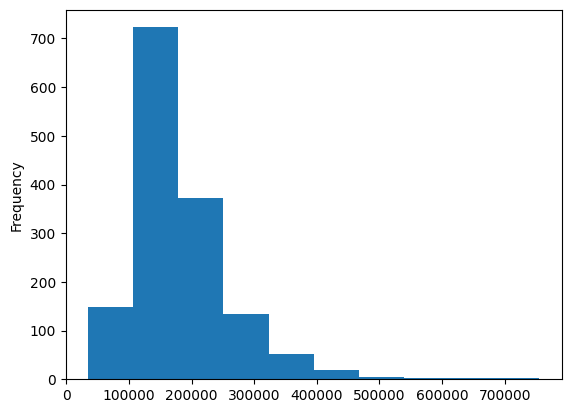

In [651]:
#price distribution histogram
price['SalePrice'].plot(kind = 'hist')
plt.show()

#extreme right-skew
#will need a transformation

In [652]:
#summary stats
price_stats = price['SalePrice'].describe()
price_stats['IQR'] = price_stats['75%'] - price_stats['25%']
price_stats['range'] = price_stats['max'] - price_stats['min']
price_stats

#mean > median
#typical range vs range, max value

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
IQR       84025.000000
range    720100.000000
Name: SalePrice, dtype: float64

## 1.3 Univariate Analysis (Original Data)

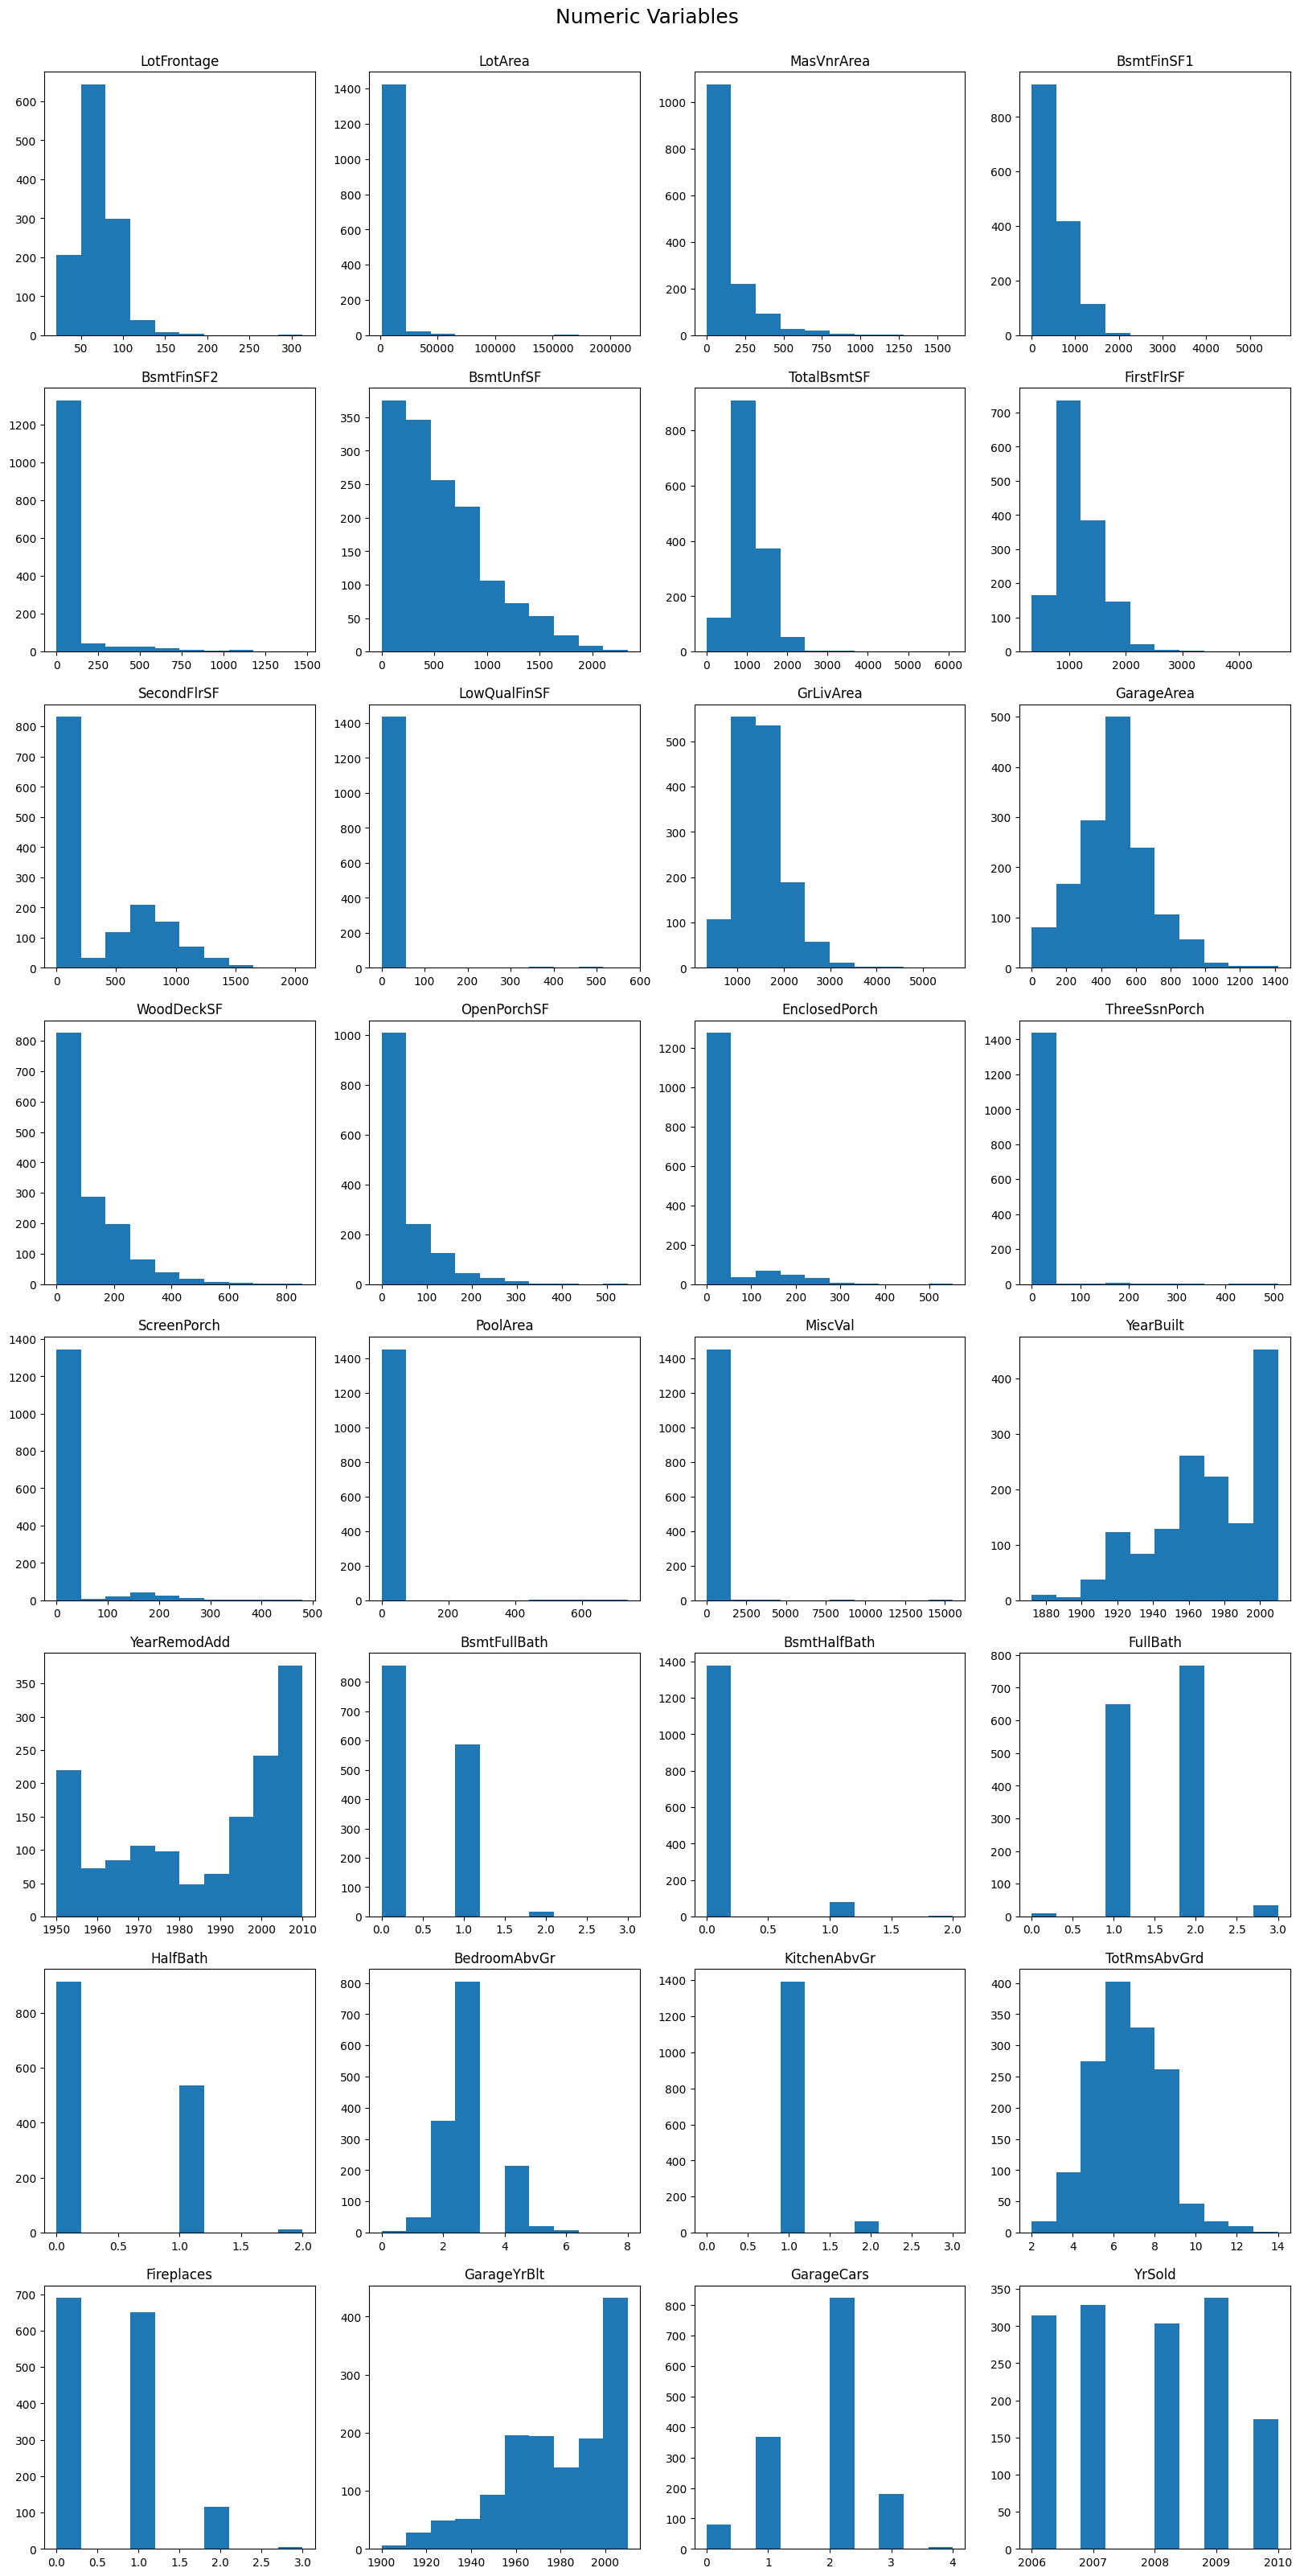

In [654]:
#histograms of numeric variables
plots(rows = 8, 
      cols = 4, 
      size = (20, 40), 
      title = "Numeric Variables", 
      df = price, 
      vars = num, 
      type = 'hist')

#many vars are not normally distributed (transform price)
#many vars have lots of observations with a value of 0, signifying properties that lack a particular feature
#some variables (PoolArea, X3SsnPorch) contain so few non-zero observations that they’re not visible on plots
#outliers skew distributions of some variables like LotFrontage, LotArea, etc.

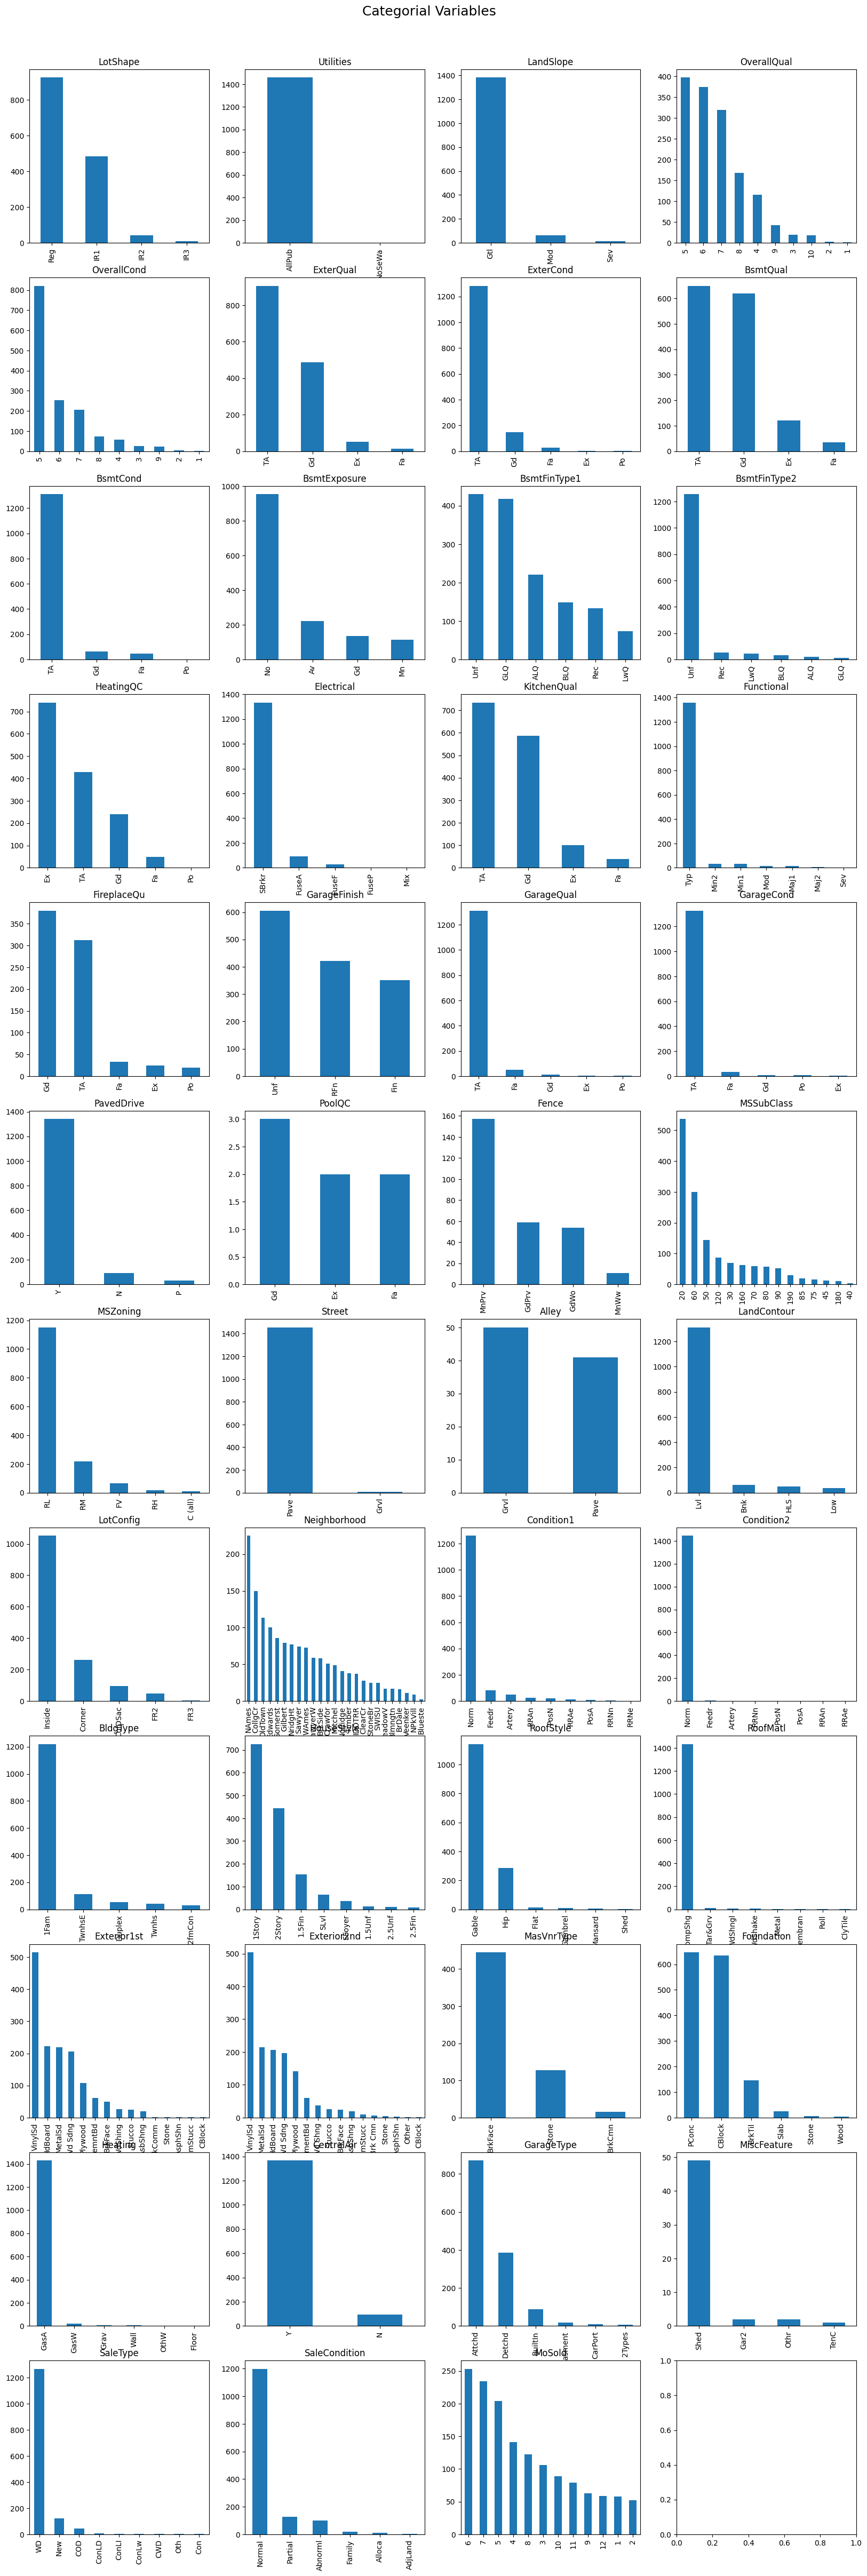

In [655]:
#bar charts of categorical variables
plots(rows = 12, 
      cols = 4, 
      size = (20, 60), 
      title = "Categorial Variables", 
      df = price, 
      vars = cat, 
      type = 'bar')

#vars like street, utilities probably not good predictors
#vars with >8 categories could be grouped

## 1.4 Bivariate Analysis (Original Data)

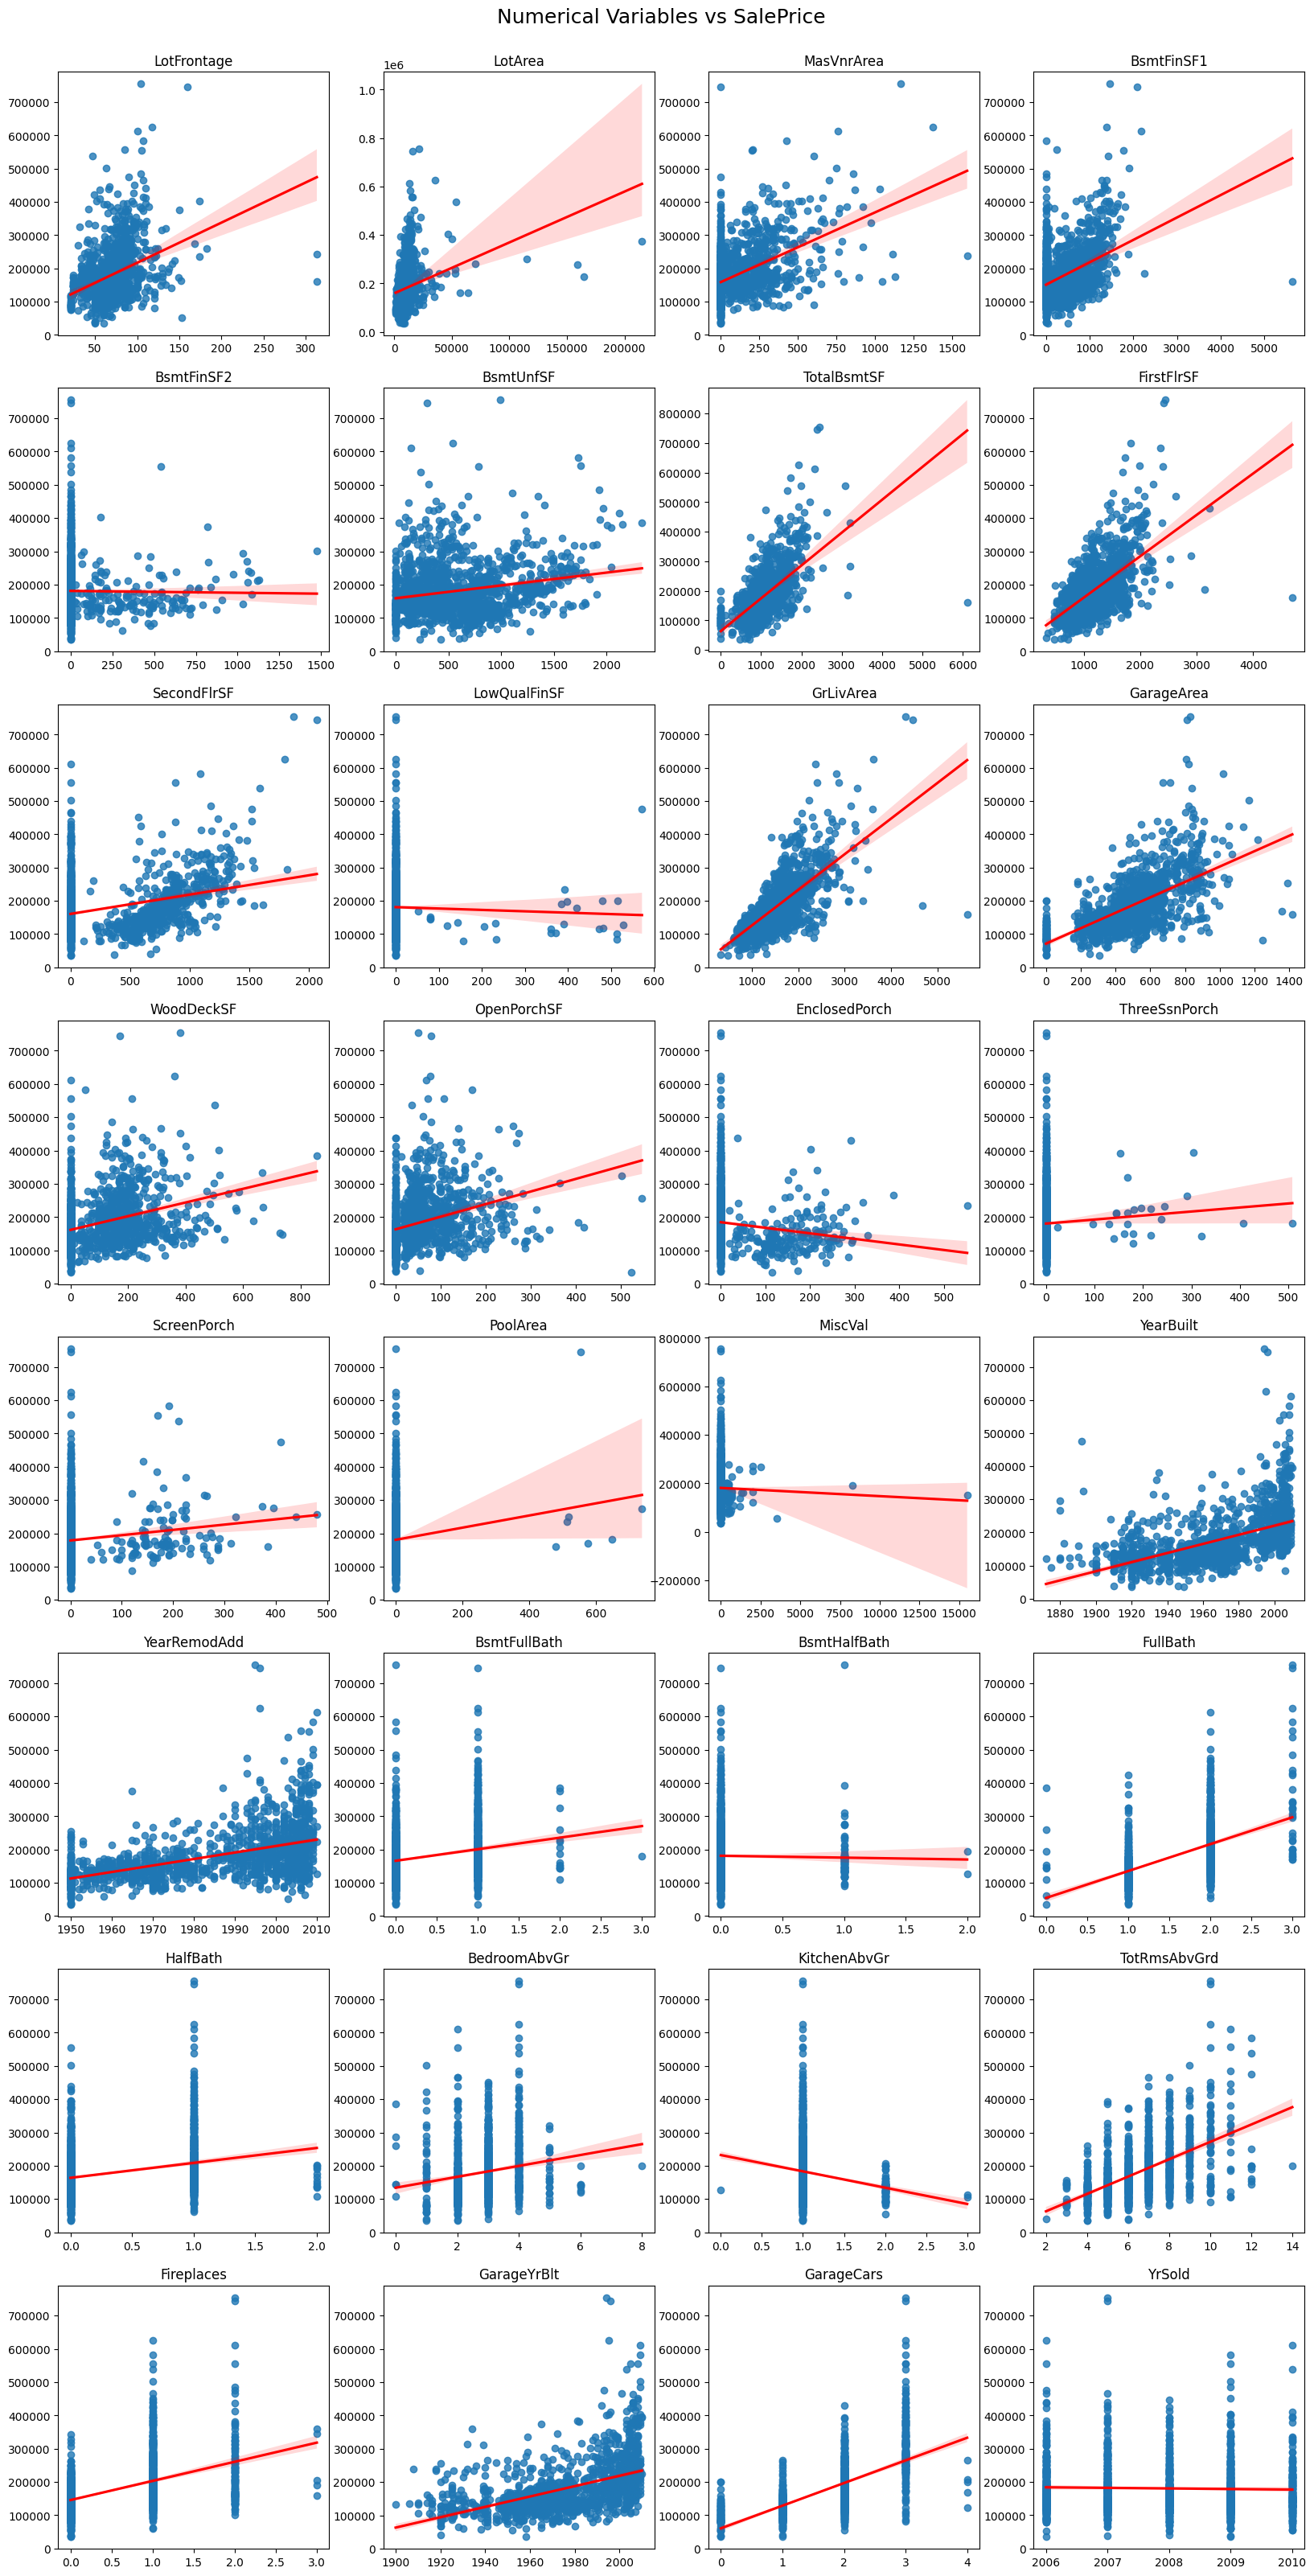

In [657]:
#scatterplots of numeric variables vs SalePrice
plots(rows = 8, 
      cols = 4, 
      size = (20, 40), 
      title = "Numerical Variables vs SalePrice", 
      df = price, 
      vars = num, 
      type = 'scatter')

#problem - 0 indicates lack of feature, but is skewing distributions
#lots of outliers
#size and area related variables look like good predictors

In [658]:
#correlations for numeric vars
corrs('SalePrice', continuous + discrete, price)

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
FirstFlrSF       0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
SecondFlrSF      0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
ThreeSsnPorch    0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

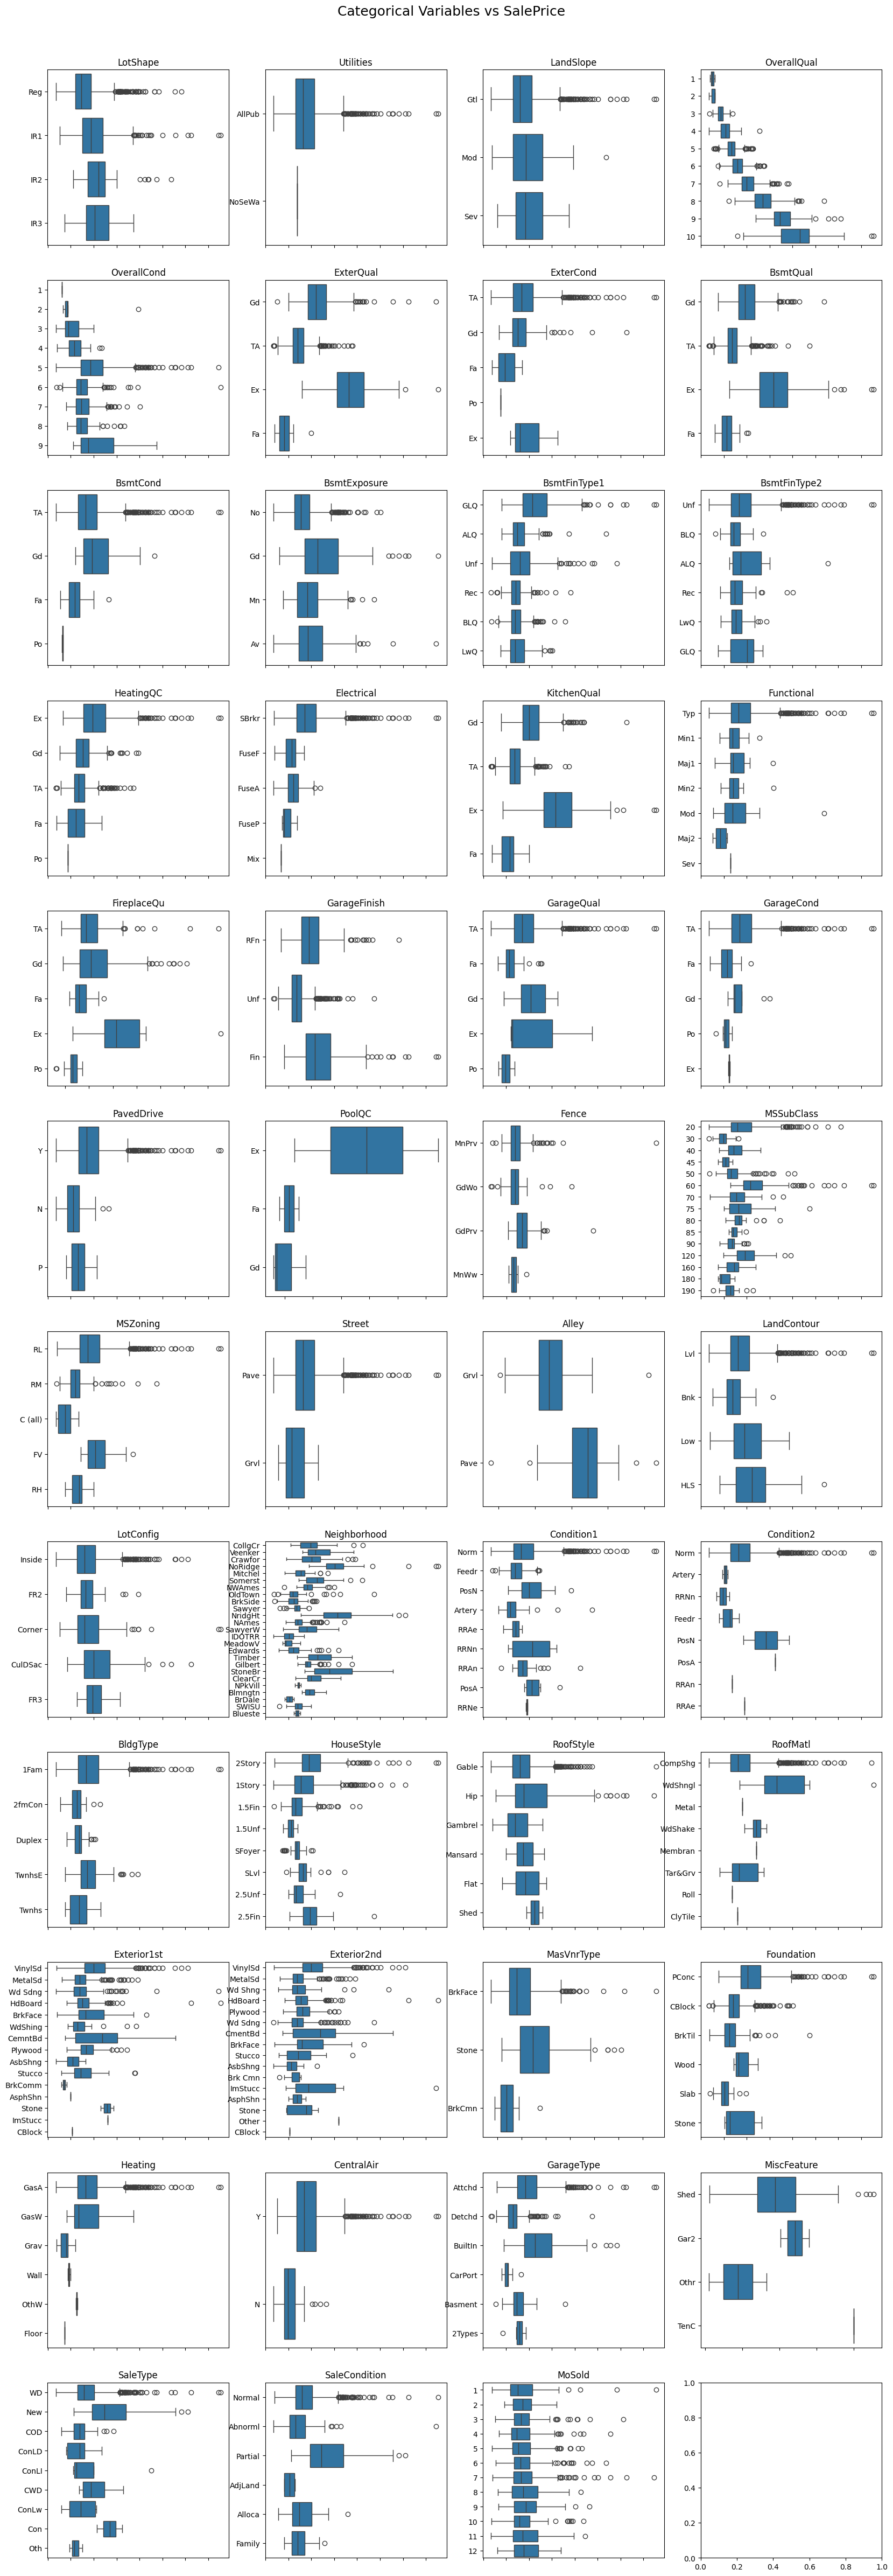

In [659]:
#boxplots of categorical variables vs SalePrice
plots(rows = 12, 
      cols = 4, 
      size = (20, 60), 
      title = "Categorical Variables vs SalePrice", 
      df = price, 
      vars = cat, 
      type = 'box')

In [660]:
#R2 scores of price and cateogorical vars
reg_stats(cat, 'R2')

,Variable,R2
3,OverallQual,0.682221
29,Neighborhood,0.537975
5,ExterQual,0.476311
14,KitchenQual,0.455479
7,BsmtQual,0.452601
26,Alley,0.277469
17,GarageFinish,0.266211
39,Foundation,0.253811
23,MSSubClass,0.239014
42,GarageType,0.203749


# 2. Data Preparation

## 2.1 Missing Values

In [663]:
#identify vars with lots of missing values
null_counts = price.isnull().sum()
null_counts[null_counts > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Exploring Reasons for Null Values

In [665]:
#cross checking lot
print(price['LotConfig'][price.LotFrontage.isnull()].unique())

#can't find reason for nulls

['Corner' 'Inside' 'CulDSac' 'FR2']


In [666]:
#masonry vars
null_mvt = price.MasVnrType.isnull()
null_mva = price.MasVnrArea.isnull()
no_mas = price.MasVnrArea == 0
mas = price[['MasVnrType', 'MasVnrArea', 'Exterior1st', 'Exterior2nd']]

#veneer type should be 'none' if veneer area = 0
none = mas[null_mvt & no_mas]
unexplained = mas[null_mvt].drop(none.index)

print('Null values that should be "None":', len(none))
print('Unexplained nulls:', len(unexplained))

#note: lots of discrepencies, one of the exteriors will have masonry but the masonry variables contradict

Null values that should be "None": 859
Unexplained nulls: 13


In [667]:
#basement vars
b = price[["BsmtCond", "BsmtQual", "BsmtFinType1", "BsmtFinType2", "TotalBsmtSF",
           "BsmtExposure", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "BsmtFullBath", 
           "BsmtHalfBath"]]
print(b.BsmtQual.unique())
b[b.isnull().any(axis = 1)]

#two missing values, rest = 'None'

['Gd' 'TA' 'Ex' nan 'Fa']


,BsmtCond,BsmtQual,BsmtFinType1,BsmtFinType2,TotalBsmtSF,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
332,TA,Gd,GLQ,NaN,3206,No,1124,479,1603,1,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


In [668]:
#cross-checking fireplace
len(price.Fireplaces[price.Fireplaces == 0])

#fireplace quality should be 'none' if fireplace area = 0
#no real nulls

690

In [669]:
#garage vars
gar = price[["GarageArea", "GarageType", "GarageQual", "GarageCond", "GarageFinish", "GarageCars", "GarageYrBlt"]]
gar[(gar.isnull().any(axis = 1)) & (gar.GarageArea > 0)]

#no real nulls

,GarageArea,GarageType,GarageQual,GarageCond,GarageFinish,GarageCars,GarageYrBlt


In [670]:
#cross checking pool
print(price[(price.PoolArea != 0)].index)
print(price[price.PoolQC.notna()].index)

#no real nulls

Index([197, 810, 1170, 1182, 1298, 1386, 1423], dtype='int64')
Index([197, 810, 1170, 1182, 1298, 1386, 1423], dtype='int64')


In [671]:
#cross-checking misc
len(price[(price.MiscVal == 0) & (price.MiscFeature.isnull())])

#no real nulls

1406

In [672]:
#conclusions:

#explainable nulls: variables where nulls signify lack of a feature
#unexplainable nulls: variables where data is truly missing
#procedure: fill numeric explainable nulls with '0', categorical explainable nulls with 'None', impute unexplainable nulls

### Handling Nulls

In [674]:
#mean imputation for unexplainable nulls
price['LotFrontage'].fillna(price['LotFrontage'].mean(), inplace = True)

import warnings
warnings.filterwarnings('ignore')

#filling explainable nulls
null_counts = price.isnull().sum()
for i in null_counts[null_counts > 0].index.to_list():
    if i in num:
        price[i].fillna(0, inplace = True)  
    else:
        price[i].fillna('None', inplace = True)

## 2.2 Transforming Price Distribution

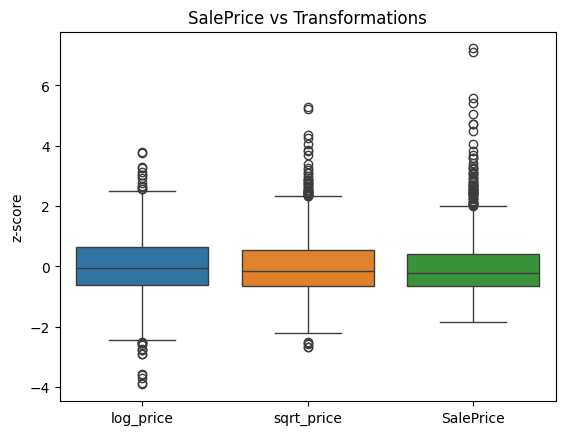

In [811]:
#transformations on price

#log
price['log_price'] = np.log(price['SalePrice'])

#sqrt
price['sqrt_price'] = np.sqrt(price['SalePrice'])

#plotting
sns.boxplot(data = [stats.zscore(price['log_price']), 
                    stats.zscore(price['sqrt_price']), 
                    stats.zscore(price['SalePrice'])])
plt.title('SalePrice vs Transformations')
plt.ylabel("z-score")
plt.show()

#log seems to be best - distribution is most symmetric, tails are still long
price.drop('sqrt_price', axis = 1, inplace = True)

In [677]:
#updated R2 scores categorical
print(reg_stats(cat, 'R2', 'log_price'))

         Variable        R2
3     OverallQual  0.671359
29   Neighborhood  0.563630
5       ExterQual  0.460012
7        BsmtQual  0.450795
14    KitchenQual  0.446502
17   GarageFinish  0.379758
42     GarageType  0.331892
23     MSSubClass  0.323637
16    FireplaceQu  0.308528
39     Foundation  0.301257
12      HeatingQC  0.231410
10   BsmtFinType1  0.224469
38     MasVnrType  0.186472
36    Exterior1st  0.173601
24       MSZoning  0.173573
37    Exterior2nd  0.162856
4     OverallCond  0.162259
19     GarageCond  0.142217
9    BsmtExposure  0.140237
18     GarageQual  0.138403
45  SaleCondition  0.126025
41     CentralAir  0.123022
44       SaleType  0.115264
33     HouseStyle  0.097768
13     Electrical  0.093416
20     PavedDrive  0.091982
0        LotShape  0.085946
8        BsmtCond  0.084127
6       ExterCond  0.042889
34      RoofStyle  0.039807
22          Fence  0.039760
11   BsmtFinType2  0.039325
32       BldgType  0.037502
30     Condition1  0.037154
40        Heating  0

In [678]:
#updated R2 scores numerical
print(reg_stats(num, 'R2', 'log_price'))

         Variable        R2
10      GrLivArea  0.490949
30     GarageCars  0.462882
11     GarageArea  0.423259
6     TotalBsmtSF  0.374279
7      FirstFlrSF  0.355945
23       FullBath  0.353309
19      YearBuilt  0.343615
20   YearRemodAdd  0.319446
27   TotRmsAbvGrd  0.285117
28     Fireplaces  0.239039
2      MasVnrArea  0.181576
3      BsmtFinSF1  0.137810
29    GarageYrBlt  0.121208
0     LotFrontage  0.112392
12     WoodDeckSF  0.111037
13    OpenPorchSF  0.102460
8     SecondFlrSF  0.101337
24       HalfBath  0.097967
1         LotArea  0.065573
21   BsmtFullBath  0.055154
5       BsmtUnfSF  0.048625
25   BedroomAbvGr  0.043043
14  EnclosedPorch  0.021545
26   KitchenAbvGr  0.021099
16    ScreenPorch  0.014015
17       PoolArea  0.004189
15  ThreeSsnPorch  0.002330
9    LowQualFinSF  0.000756
31         YrSold  0.000704
18        MiscVal -0.000285
22   BsmtHalfBath -0.000659
4      BsmtFinSF2 -0.000663


## 2.3 Recoding Dataset

In [680]:
#aggregating features
price['TotalSF'] = price['GrLivArea'] + price['TotalBsmtSF'] + price['GarageArea'] + price['ScreenPorch'] + price['WoodDeckSF'] + price['OpenPorchSF'] + price['ThreeSsnPorch'] - price['EnclosedPorch']
price['TotalBaths'] = price['BsmtHalfBath'] * 0.5 + price['HalfBath'] * 0.5 + price['FullBath'] + price['BsmtFullBath']

In [681]:
#seeing effect of new features

#aggregate correlations
print('NEW CORRELATIONS:')
print(corrs('log_price', ['TotalBaths', 'TotalSF'], price))

#original correlations
print('\nOLD CORRELATIONS:')
redundant = ['OpenPorchSF', 'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 
             'BsmtHalfBath', 'HalfBath', 'FullBath', 'BsmtFullBath', 'TotRmsAbvGrd', 'BsmtFinSF1', 'BsmtFinSF2', 
             'SecondFlrSF', 'FirstFlrSF', 'LowQualFinSF', 'BsmtUnfSF', 'WoodDeckSF', 'LowQualFinSF'] #variable that make up aggregates
print(corrs('log_price', redundant, price))

#aggregation increased correlation with price - keep new vars

NEW CORRELATIONS:
log_price     1.000000
TotalSF       0.821500
TotalBaths    0.673011
Name: log_price, dtype: float64

OLD CORRELATIONS:
log_price        1.000000
GrLivArea        0.700927
GarageArea       0.650888
TotalBsmtSF      0.612134
FirstFlrSF       0.596981
FullBath         0.594771
TotRmsAbvGrd     0.534422
BsmtFinSF1       0.372023
WoodDeckSF       0.334135
OpenPorchSF      0.321053
SecondFlrSF      0.319300
HalfBath         0.313982
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
EnclosedPorch    0.149050
ScreenPorch      0.121208
ThreeSsnPorch    0.054900
LowQualFinSF     0.037963
LowQualFinSF     0.037963
BsmtHalfBath     0.005149
BsmtFinSF2       0.004832
Name: log_price, dtype: float64


In [682]:
#updating numeric vars
updated_num = list(set(num) - set(redundant)) #removing redundant vars
updated_num += ['TotalSF', 'TotalBaths'] #adding new vars

In [824]:
#recoding dummy columns for nominal vars for regreesion
df_pandas_encoded = pd.get_dummies(price[nominal], columns = nominal, drop_first = True) #drop one category
df_pandas_encoded.rename(columns = {'HouseStyle_1.5Fin': 'HouseStyle_15Fin',
                                    'HouseStyle_1.5Unf': 'HouseStyle_15Unf',
                                    'HouseStyle_2.5Fin': 'HouseStyle_25Fin',
                                    'HouseStyle_2.5Unf': 'HouseStyle_25Unf',
                                    'Exterior1st_Wd Sdng': 'Exterior1st_WdSdng',
                                    'Exterior2nd_Wd Sdng': 'Exterior2nd_WdSdng',
                                    'Exterior2nd_Wd Shng': 'Exterior2nd_WdShng',
                                    'Exterior2nd_Brk Cmn': 'Exterior2nd_BrkCmn',
                                    'MSZoning_C (all)': 'MSZoning_C',
                                    'RoofMatl_Tar&Grv': 'RoofMatl_TarGrv'}, inplace = True) #renaming to avoid errors

#list of dummy columns
oh_nominal = df_pandas_encoded.columns.to_list() 

#updating dataset without modifying the original
cleaned_price = pd.concat([price.drop(columns = (redundant + ['Id'])), df_pandas_encoded], axis = 1) 

In [826]:
#formulaically generating code
for i in ordinal:
    print(f'cleaned_price.{i}.replace({{{price[i].unique()}}}, inplace = True)')

#recoding ordinal variables for regression
cleaned_price.OverallQual.replace({'None': 0}, inplace = True)
cleaned_price.OverallCond.replace({'None': 0}, inplace = True)
cleaned_price.LotShape.replace({'None': 0, 'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}, inplace = True)
cleaned_price.Utilities.replace({'None': 0,'AllPub': 2, 'NoSeWa': 1}, inplace = True)
cleaned_price.LandSlope.replace({'None': 0, 'Gtl': 1, 'Mod': 2, 'Sev': 3}, inplace = True)
cleaned_price.ExterQual.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
cleaned_price.ExterCond.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
cleaned_price.BsmtQual.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
cleaned_price.BsmtCond.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
cleaned_price.BsmtExposure.replace({'No': 1, 'Gd': 4, 'Mn': 2, 'Av': 3, 'None': 0}, inplace = True)
cleaned_price.BsmtFinType1.replace({'GLQ': 6, 'ALQ': 5, 'Unf': 1, 'Rec': 3, 'BLQ': 4, 'None': 0, 'LwQ': 2}, inplace = True)
cleaned_price.BsmtFinType2.replace({'GLQ': 6, 'ALQ': 5, 'Unf': 1, 'Rec': 3, 'BLQ': 4, 'None': 0, 'LwQ': 2}, inplace = True)
cleaned_price.HeatingQC.replace({'None': 0, 'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5}, inplace=True)
cleaned_price.Electrical.replace({'None': 0, 'SBrkr': 5, 'FuseF': 3, 'FuseA': 4, 'FuseP': 2, 'Mix': 1}, inplace = True)
cleaned_price.KitchenQual.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
cleaned_price.Functional.replace({'None': 0, 'Typ': 1, 'Min1': 2, 'Maj1': 5, 'Min2': 3, 'Mod': 4, 'Maj2': 6, 'Sev': 7}, inplace = True)
cleaned_price.FireplaceQu.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
cleaned_price.GarageFinish.replace({'RFn': 2, 'Unf': 1, 'Fin': 3, 'None': 0}, inplace = True)
cleaned_price.GarageQual.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
cleaned_price.GarageCond.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
cleaned_price.PavedDrive.replace({'None': 0, 'Y': 3, 'N': 1, 'P': 2}, inplace = True)
cleaned_price.PoolQC.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
cleaned_price.Fence.replace({'None': 0, 'MnPrv': 3, 'GdWo': 2, 'GdPrv': 4, 'MnWw': 1}, inplace = True)

cleaned_price.LotShape.replace({['Reg' 'IR1' 'IR2' 'IR3']}, inplace = True)
cleaned_price.Utilities.replace({['AllPub' 'NoSeWa']}, inplace = True)
cleaned_price.LandSlope.replace({['Gtl' 'Mod' 'Sev']}, inplace = True)
cleaned_price.OverallQual.replace({[ 7  6  8  5  9  4 10  3  1  2]}, inplace = True)
cleaned_price.OverallCond.replace({[5 8 6 7 4 2 3 9 1]}, inplace = True)
cleaned_price.ExterQual.replace({['Gd' 'TA' 'Ex' 'Fa']}, inplace = True)
cleaned_price.ExterCond.replace({['TA' 'Gd' 'Fa' 'Po' 'Ex']}, inplace = True)
cleaned_price.BsmtQual.replace({['Gd' 'TA' 'Ex' 'None' 'Fa']}, inplace = True)
cleaned_price.BsmtCond.replace({['TA' 'Gd' 'None' 'Fa' 'Po']}, inplace = True)
cleaned_price.BsmtExposure.replace({['No' 'Gd' 'Mn' 'Av' 'None']}, inplace = True)
cleaned_price.BsmtFinType1.replace({['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']}, inplace = True)
cleaned_price.BsmtFinType2.replace({['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']}, inplace = True)
cleaned_price.HeatingQC.replace({[

## 2.4 Outliers

Outliers for Fireplaces: []
Outliers for GarageYrBlt: [916]
Outliers for PoolArea: []
Outliers for LotArea: []
Outliers for YrSold: []
Outliers for MiscVal: []
Outliers for GarageCars: [812, 916]
Outliers for MasVnrArea: [495, 916, 1182]
Outliers for KitchenAbvGr: []
Outliers for YearBuilt: [185, 691, 916, 1182]
Outliers for YearRemodAdd: [691, 710, 1182]
Outliers for LotFrontage: [1298, 1337]
Outliers for BedroomAbvGr: []
Outliers for TotalSF: [30, 410, 495, 523, 916, 968, 1298]
Outliers for TotalBaths: [738]


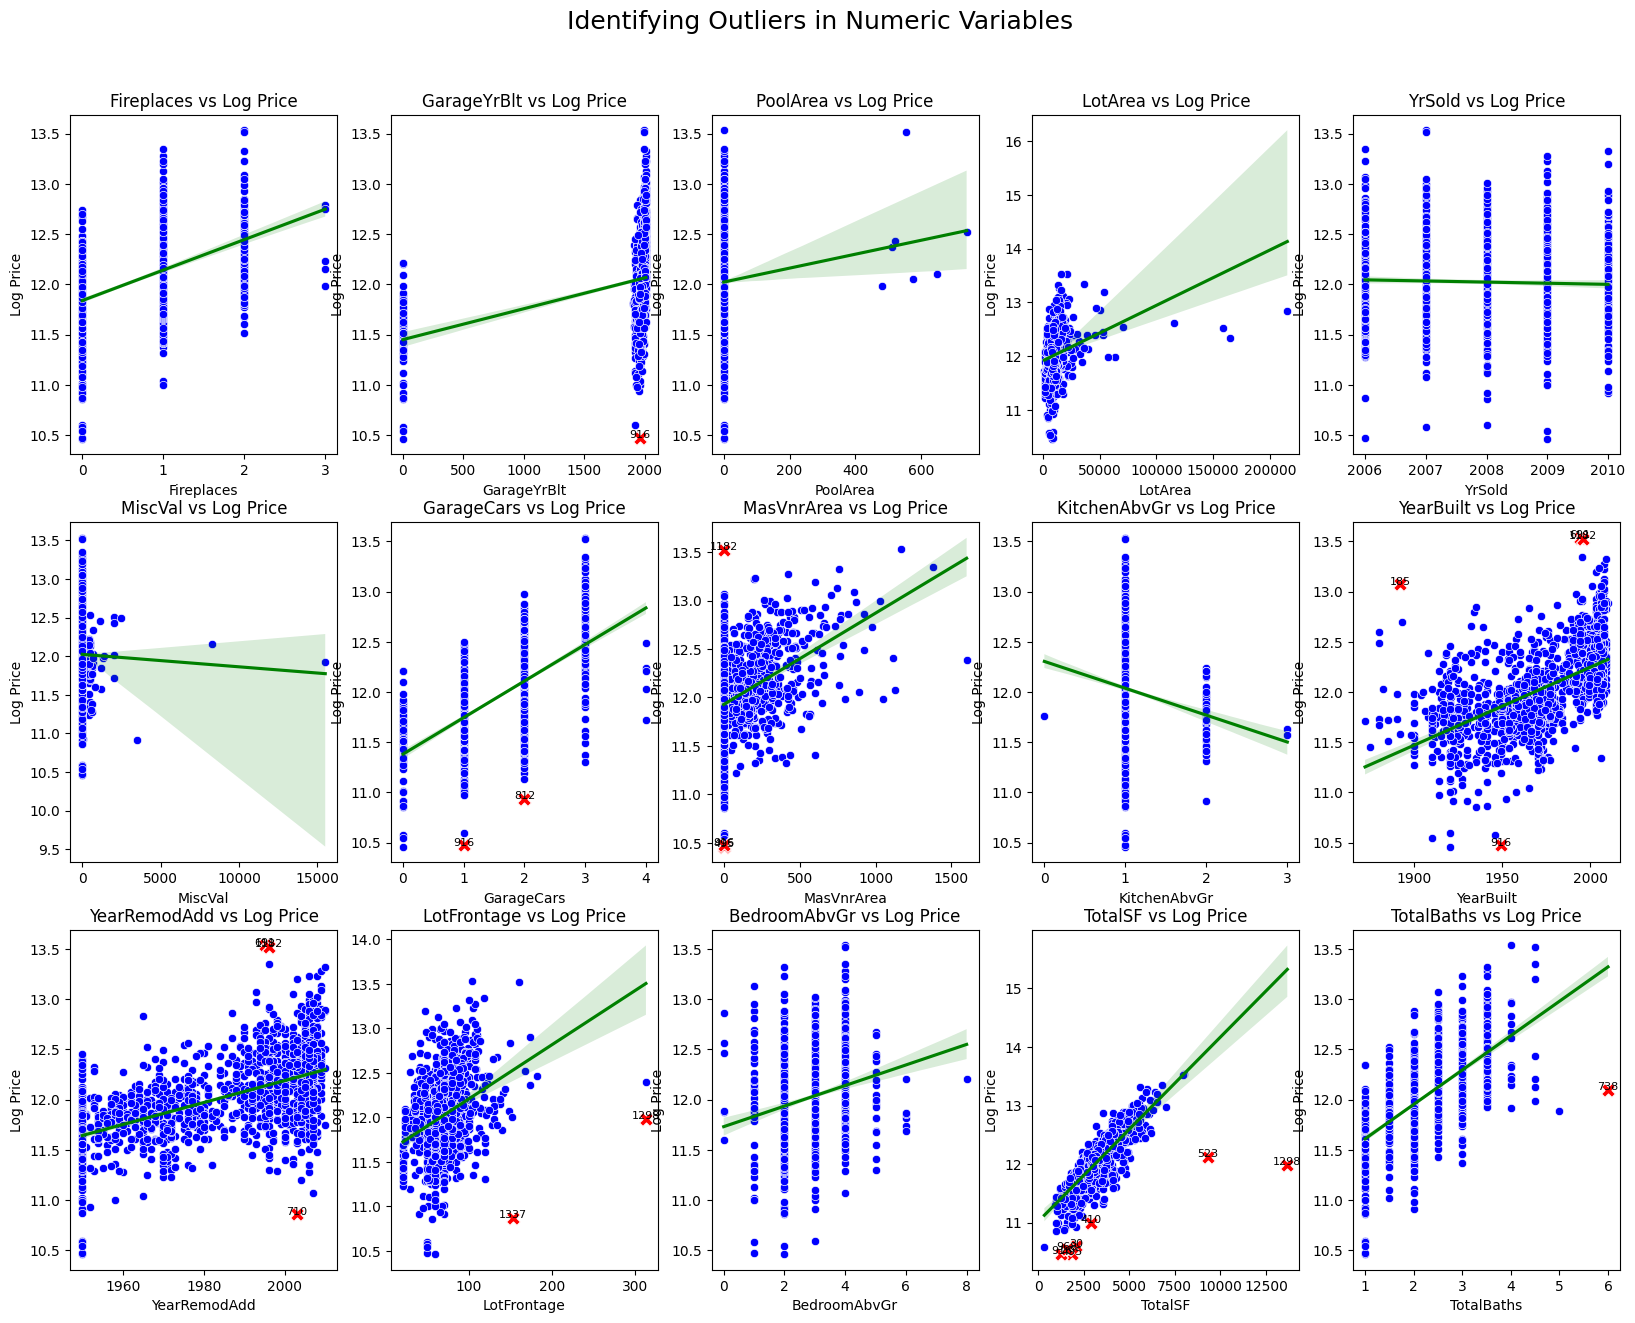

In [686]:
#finding outliers on scatterplots
fig, axs = plt.subplots(nrows = 3, ncols = 5, figsize = (20, 15))
fig.suptitle("Identifying Outliers in Numeric Variables", fontsize = 18, y = 0.95)

for var, ax in zip(updated_num, axs.ravel()):
    formula = f'log_price ~ {var}'
    model = smf.ols(formula = formula, data = price).fit()

    price['residuals'] = model.resid

    threshold = 4 * price['residuals'].std() #THRESHOLD FOR OUTLIERS

    # Identify outliers based on residuals
    outliers = price[price['residuals'].abs() > threshold]
    non_outliers = price[price['residuals'].abs() <= threshold]

    # Scatterplot for non-outliers
    sns.scatterplot(x = var, y = 'log_price', data = non_outliers, ax = ax, color = 'blue')

    # Scatterplot for outliers
    sns.scatterplot(x = var, y = 'log_price', data = outliers, ax = ax, color = 'red', marker = 'X', s = 100)

    # Add regression line for visualization
    sns.regplot(x = var, y = 'log_price', data = price, ax = ax, line_kws = {'color': 'green'}, scatter = False)

    for idx, row in outliers.iterrows():
        ax.text(row[var], row['log_price'], str(idx), color = 'black', fontsize = 8, ha = 'center')

    ax.set_title(f'{var} vs Log Price')
    ax.set_xlabel(var)
    ax.set_ylabel('Log Price')
    
    print(f'Outliers for {var}: {outliers.index.to_list()}')

plt.show()

In [828]:
#outliers from LotFrontage, LotArea, TotalSF
remove = [30, 410, 968, 738, 185, 691, 916, 1182, 495, 710, 1182, 812, 249, 335, 313, 934, 1298, 1337, 523, 706]

#removing outliers
cleaned_price = cleaned_price.drop(index = remove).reset_index(drop = True)

In [688]:
#seeing if correlations improve after removing outliers
mags1 = corrs('log_price', updated_num, cleaned_price) #new correlations
mags2 = corrs('log_price', updated_num, price) #old correlations
diff = mags1 - mags2 #difference

#displaying results
comparison_table = pd.DataFrame({
    'Cleaned_Price': mags1,
    'Original_Price': mags2,
    'Difference:': diff
})

print(comparison_table)
print(sum(diff))

              Cleaned_Price  Original_Price  Difference:
BedroomAbvGr       0.191095        0.209044    -0.017948
Fireplaces         0.480197        0.489449    -0.009253
GarageCars         0.680771        0.680625     0.000146
GarageYrBlt        0.335252        0.349014    -0.013762
KitchenAbvGr       0.156211        0.147548     0.008663
LotArea            0.358614        0.257320     0.101294
LotFrontage        0.360349        0.336156     0.024194
MasVnrArea         0.432401        0.426775     0.005625
MiscVal            0.023107        0.020021     0.003086
PoolArea           0.041538        0.069798    -0.028260
TotalBaths         0.674632        0.673011     0.001621
TotalSF            0.864797        0.821500     0.043296
YearBuilt          0.598673        0.586570     0.012103
YearRemodAdd       0.568766        0.565608     0.003159
YrSold             0.029834        0.037263    -0.007429
log_price          1.000000        1.000000     0.000000
0.12653511908590956


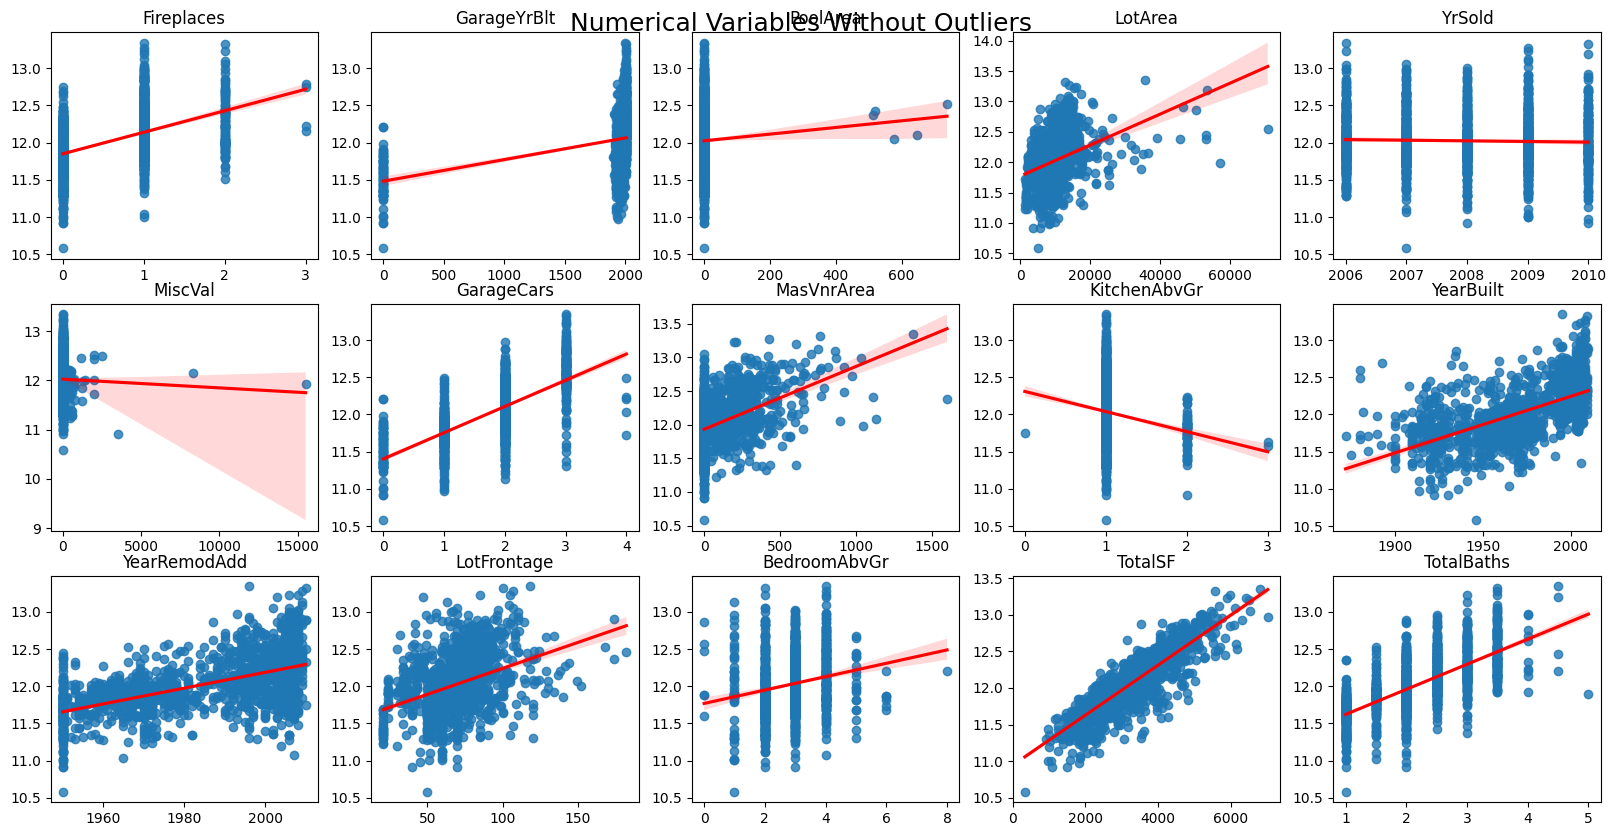

In [689]:
#scatterplots of numeric variables after removing outliers
plots(rows = 3, 
      cols = 5, 
      size = (20, 10), 
      title = "Numerical Variables Without Outliers", 
      df = cleaned_price, 
      vars = updated_num, 
      type = 'scatter',
      target = 'log_price')

# 3. Causal Analysis

In [830]:
#variables that are statistically significant with SalePrice
sp = reg_stats(updated_num + ordinal + oh_nominal, 'p', target = 'SalePrice', df = cleaned_price)
sig_sp = sp[sp['p'] < 0.05]['Variable'].tolist()

#variables that are statistically significant with BedroomAbvGr
bed = reg_stats(updated_num + ordinal + oh_nominal, 'p', target = 'BedroomAbvGr', df = cleaned_price)
sig_bed = bed[bed['p'] < 0.05]['Variable'].tolist()

#variables that are statistically associated with both BedroomAbvGr and SalePrice
confound_vars = list(set(sig_sp) & set(sig_bed))
sorted(confound_vars)

['BedroomAbvGr',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosN',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Fireplaces',
 'GarageCars',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'Heating_Grav',
 'HouseStyle_15Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_30',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_90',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'MasVnrArea',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'Neighborhood_BrkSide',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_SWISU',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'SaleCondition_Partial',
 'SaleType_New',
 'TotalBaths',

In [838]:
vars = ['BedroomAbvGr', 'BldgType', 'Condition1', 'Exterior1st', 'Exterior2nd', 'Fireplaces',
 'GarageCars', 'GarageType', 'Heating', 'HouseStyle', 'KitchenAbvGr',
 'LotArea', 'LotFrontage', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'Neighborhood', 
 'SaleCondition', 'SaleType', 'TotalBaths', 'TotalSF', 'YearBuilt']

#model without confounding variables 
direct_model = smf.ols('SalePrice ~ BedroomAbvGr', data = cleaned_price).fit()

#model with confounding variables
controlled_model = smf.ols('SalePrice ~ ' + ' + '.join(confound_vars), data = cleaned_price).fit()

#comparing models
summary_col([direct_model, controlled_model], stars = True)

,SalePrice I,SalePrice II
Intercept,140281.3511***,-720342.4944***
,(7217.7282),(111675.9245)
BedroomAbvGr,13969.3089***,-8164.1231***
,(2421.8347),(1344.0226)
Neighborhood_SWISU[T.True],,-3595.6061
,,(6701.0804)
MSZoning_RL[T.True],,30417.6682**
,,(13662.2006)
GarageType_CarPort[T.True],,-23466.2813**
,,(10574.2941)


# 4. Modeling

## 4.1 Feature Selection

### p-values

In [696]:
#p-values for numeric variables vs log price
p = reg_stats(updated_num, 'p', 'log_price')
sig_num = p[p['p'] < 0.05]['Variable'].tolist()
sig_num

['PoolArea',
 'KitchenAbvGr',
 'BedroomAbvGr',
 'LotArea',
 'LotFrontage',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'YearRemodAdd',
 'YearBuilt',
 'TotalBaths',
 'GarageCars',
 'TotalSF']

In [697]:
#p-values for nominal variables vs log price
p = reg_stats(oh_nominal, 'p', 'log_price', df = cleaned_price)
sig_dummies = sorted(p[p['p'] < 0.05]['Variable'].tolist())
sig_dummies

['Alley_None',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'CentralAir_Y',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosN',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosN',
 'Condition2_RRNn',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_VinylSd',
 'Exterior1st_WdSdng',
 'Exterior1st_WdShing',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_WdSdng',
 'Exterior2nd_WdShng',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'GarageType_Attchd',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageType_None',
 'Heating_GasA',
 'Heating_Grav',
 'Heating_Wall',
 'HouseStyle_15Unf',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'LotConfig_Inside',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubCl

In [725]:
#p-values for ordinal variables vs log price
p = reg_stats(ordinal, 'p', 'log_price')
sig_ord = p[p['p'] < 0.05]['Variable'].tolist()
sig_ord

['GarageQual',
 'PavedDrive',
 'BsmtFinType1',
 'BsmtFinType2',
 'LotShape',
 'Functional',
 'ExterCond',
 'Fence',
 'BsmtExposure',
 'FireplaceQu',
 'BsmtCond',
 'HeatingQC',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'GarageFinish']

In [727]:
sig_cat = sig_dummies + sig_ord

### Combination Selection

In [734]:
def combination(df, target, first, vars):
    xvars = vars
    features = []
    hP = 1 
    
    while True:
        if len(features) == 0:
            r2 = []
    
            formula = target + ' ~ ' + first
            reg = smf.ols(formula, data = df).fit()
            r2.append(reg.rsquared_adj)
            bestR2 = max(r2)
            features.append(first)
            
        else:
            r2 = []
            for var in xvars:
                formula = target + ' ~ ' + features[0] + ' +' + ' + '.join(features[1:]) + ' + ' + var
                reg = smf.ols(formula, data = df).fit()
                r2.append(reg.rsquared_adj)
    
            if max(r2) > bestR2:
                bestR2 = max(r2)
                features.append(xvars[r2.index(bestR2)])
                xvars.remove(xvars[r2.index(bestR2)])
            
            else: 
                break
            
            formula = target + ' ~ ' + features[0] + ' +' + ' + '.join(features[1:])
            reg = smf.ols(formula, data = df).fit()
        
        # Backward elimination: remove the variable with the highest p-value > 0.05
        pvals = reg.pvalues.tolist()
        pvals.pop(0)  # Remove the intercept's p-value
        hP = max(pvals)
        
        if hP > 0.05:
            maxVar = reg.pvalues[reg.pvalues == hP].index[0]
            removed_feature = features.remove(maxVar.replace("[T.True]", ""))  # Remove the feature from 'features' list
            xvars.append(maxVar.replace("[T.True]", ""))
            
    # Print the final selected features
    return target + ' ~ ' + features[0] + ' +' + ' + '.join(features[1:])

In [744]:
#bidirectional elimination on all vars
formula = combination(cleaned_price, 'log_price', 'TotalSF', updated_num + ordinal + oh_nominal)
overfit_combination = smf.ols(formula, data = cleaned_price).fit()
print('All vars:', overfit_combination.rsquared_adj)

#bidirectional elimination on significant vars
formula = combination(cleaned_price, 'log_price', 'TotalSF', sig_cat + sig_num)
sig_combination = smf.ols(formula, data = cleaned_price).fit()
print('Sig vars:', sig_combination.rsquared_adj)

All vars: 0.9329593063284934
Sig vars: 0.9166387715650148


### Final Selection

In [754]:
#obtaining combination selection list to modify
vars = overfit_combination.model.exog_names
sorted(vars)

['Alley_Pave[T.True]',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'CentralAir_Y[T.True]',
 'Condition1_Norm[T.True]',
 'ExterCond',
 'Exterior1st_BrkFace[T.True]',
 'Exterior1st_HdBoard[T.True]',
 'Exterior1st_WdSdng[T.True]',
 'Exterior2nd_BrkCmn[T.True]',
 'Exterior2nd_WdSdng[T.True]',
 'Fireplaces',
 'Foundation_PConc[T.True]',
 'Functional',
 'GarageQual',
 'GarageType_BuiltIn[T.True]',
 'GarageType_CarPort[T.True]',
 'GarageYrBlt',
 'HeatingQC',
 'HouseStyle_25Unf[T.True]',
 'HouseStyle_2Story[T.True]',
 'Intercept',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour_Low[T.True]',
 'LotArea',
 'LotConfig_CulDSac[T.True]',
 'LotFrontage',
 'MSSubClass_160[T.True]',
 'MSSubClass_30[T.True]',
 'MSZoning_FV[T.True]',
 'MSZoning_RM[T.True]',
 'MasVnrArea',
 'MasVnrType_Stone[T.True]',
 'MoSold_5[T.True]',
 'Neighborhood_BrkSide[T.True]',
 'Neighborhood_ClearCr[T.True]',
 'Neighborhood_Crawfor[T.True]',
 'Neighborhood_MeadowV[T.True]',
 'Neighborhood_NoRidge[T.True]',
 'Neighborhood_Nr

In [774]:
#remove month sold, multiple year indicators, kitchen above ground, lot frontage, masonry veneer area, 2nd exterior
features = ['Alley_Pave', 
             'CentralAir_Y', 
             'Condition1_Norm', 
             'Exterior1st_BrkFace', 
             'Exterior1st_HdBoard', 
             'Exterior1st_WdSdng', 
             'Foundation_PConc', 
             'GarageType_BuiltIn', 
             'GarageType_CarPort', 
             'HouseStyle_2Story', 
             'LandContour_Low', 
             'LotConfig_CulDSac', 
             'MSSubClass_160', 
             'MSSubClass_30', 
             'MSZoning_FV', 
             'MSZoning_RM', 
             'MasVnrType_Stone', 
             'Neighborhood_BrkSide', 
             'Neighborhood_ClearCr', 
             'Neighborhood_Crawfor', 
             'Neighborhood_MeadowV', 
             'Neighborhood_NoRidge', 
             'Neighborhood_NridgHt', 
             'Neighborhood_StoneBr', 
             'Neighborhood_Veenker', 
             'RoofStyle_Mansard', 
             'SaleCondition_Alloca', 
             'SaleCondition_Normal', 
             'SaleType_New',
             'BsmtCond',
             'BsmtExposure',
             'BsmtFinType1',
             'ExterCond',
             'Fireplaces',
             'Functional',
             'GarageQual',
             'HeatingQC',
             'KitchenQual',
             'LotArea',
             'OverallCond',
             'OverallQual',
             'TotalBaths',
             'TotalSF',
             'YearBuilt']

#creating final formula
final = 'log_price ~ ' + f"{(features)[0]}" + "".join(f" + {var}" for var in (features)[1:])
print(final)

log_price ~ Alley_Pave + CentralAir_Y + Condition1_Norm + Exterior1st_BrkFace + Exterior1st_HdBoard + Exterior1st_WdSdng + Foundation_PConc + GarageType_BuiltIn + GarageType_CarPort + HouseStyle_2Story + LandContour_Low + LotConfig_CulDSac + MSSubClass_160 + MSSubClass_30 + MSZoning_FV + MSZoning_RM + MasVnrType_Stone + Neighborhood_BrkSide + Neighborhood_ClearCr + Neighborhood_Crawfor + Neighborhood_MeadowV + Neighborhood_NoRidge + Neighborhood_NridgHt + Neighborhood_StoneBr + Neighborhood_Veenker + RoofStyle_Mansard + SaleCondition_Alloca + SaleCondition_Normal + SaleType_New + BsmtCond + BsmtExposure + BsmtFinType1 + ExterCond + Fireplaces + Functional + GarageQual + HeatingQC + KitchenQual + LotArea + OverallCond + OverallQual + TotalBaths + TotalSF + YearBuilt


## 4.2 Benchmark (Univariate Regression)

In [776]:
#finding best predictors for univariate regression
cleaned_corr = corrs('log_price', sig_num, cleaned_price)
print(f'Best predictor: {cleaned_corr.index[1]}, correlation = {round(cleaned_corr[1], 3)}')

Best predictor: TotalSF, correlation = 0.865


In [782]:
#benchmark w/ cleaned data
formula = 'log_price ~ TotalSF'
uni = smf.ols(formula, data = cleaned_price).fit()
uni.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     4268.
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:38:47   Log-Likelihood:                 330.12
No. Observations:                1441   AIC:                            -656.2
Df Residuals:                    1439   BIC:                            -645.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9450      0.017    632.106      0.000      10.911      10.979
TotalSF        0.0003   5.23e-06     65.333      0.000       0.000       0.000
==============================================================================
Omnibus:                      182.794   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.863
Skew:                          -0.832   Prob(JB):                     7.01e-69
Kurtosis:                       4.567   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

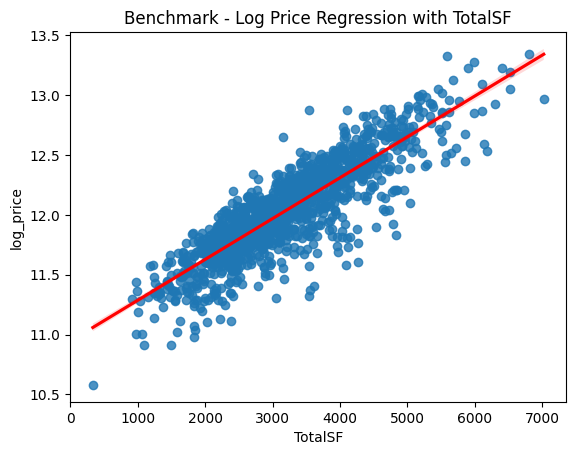

In [780]:
#plotting benchmark
sns.regplot(data = cleaned_price, x = 'TotalSF', y = 'log_price', line_kws = dict(color = "r"))
plt.title('Benchmark - Log Price Regression with TotalSF')
plt.show()

## 4.3 Predictive Model (Multivariate Regression)

In [764]:
#an overfitted model using all variables
formula = 'log_price ~ ' + f"{(updated_num)[0]}" + "".join(f" + {var}" for var in (updated_num)[1:]) \
            + "".join(f" + C({var})" for var in cat)

overfit_clean = smf.ols(formula, data = cleaned_price).fit()
overfit_clean.rsquared_adj

0.9379620761469353

In [766]:
#model with "significant" vars
formula = 'log_price ~ ' + f"{sig_num[0]}" + "".join(f" + {var}" for var in sig_num[1:] + sig_cat)

sig = smf.ols(formula, data = cleaned_price).fit()
sig.rsquared_adj

0.9186814343877879

In [790]:
#model with final feature selection
final = smf.ols(final, data = cleaned_price).fit()
final.rsquared_adj

0.929745849685569

In [817]:
summary_col([uni, final], stars = True)

,log_price I,log_price II
Intercept,10.9450***,7.7000***
,(0.0173),(0.3652)
TotalSF,0.0003***,0.0002***
,(0.0000),(0.0000)
Alley_Pave[T.True],,0.0521***
,,(0.0191)
CentralAir_Y[T.True],,0.0488***
,,(0.0135)
Condition1_Norm[T.True],,0.0427***
,,(0.0083)


# 5. Application

In [784]:
#loading test dataset
path = '/Users/ania/Documents/bu/semester 5/Modeling Bus Decisions/Group Project/housePrices_test.csv'
test = pd.read_csv(path)

In [798]:
#function to create property predictions using final model
def est(df, model):
    #placeholder column for predictions
    df['log_price'] = [None] * len(df)

    #rename columns to avoid errors
    df.rename(columns = {'1stFlrSF':'FirstFlrSF', 
                        '2ndFlrSF':'SecondFlrSF', 
                        '3SsnPorch':'ThreeSsnPorch'}, inplace = True)

    #nominal columns for encoding
    nominal = [
        'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
        'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition', 
        'MoSold'
    ]

    #handle nulls depending on variable type
    null_counts = df.isnull().sum()
    for i in null_counts[null_counts > 0].index.to_list():
        if i in nominal:
            df[i].fillna('None', inplace=True)
        else:
            df[i].fillna(0, inplace=True)

    #encode nominal variables and rename problematic columns
    df_encoded = pd.get_dummies(df[nominal], columns = nominal, drop_first = True)
    df_encoded.rename(columns = {'HouseStyle_1.5Fin': 'HouseStyle_15Fin',
                                        'HouseStyle_1.5Unf': 'HouseStyle_15Unf',
                                        'HouseStyle_2.5Fin': 'HouseStyle_25Fin',
                                        'HouseStyle_2.5Unf': 'HouseStyle_25Unf',
                                        'Exterior1st_Wd Sdng': 'Exterior1st_WdSdng',
                                        'Exterior2nd_Wd Sdng': 'Exterior2nd_WdSdng',
                                        'Exterior2nd_Wd Shng': 'Exterior2nd_WdShng',
                                        'Exterior2nd_Brk Cmn': 'Exterior2nd_BrkCmn',
                                        'MSZoning_C (all)': 'MSZoning_C',
                                        'RoofMatl_Tar&Grv': 'RoofMatl_TarGrv'}, inplace = True)

    #list of encoded columns in regression model
    expected_columns = [
            'Alley_Pave', 'CentralAir_Y', 'Condition1_Norm', 'Exterior1st_BrkFace', 
            'Exterior1st_HdBoard', 'Exterior1st_WdSdng', 'Foundation_PConc', 
            'GarageType_BuiltIn', 'GarageType_CarPort', 'HouseStyle_2Story', 
            'LandContour_Low', 'LotConfig_CulDSac', 'MSSubClass_160', 
            'MSSubClass_30', 'MSZoning_FV', 'MSZoning_RM', 'MasVnrType_Stone', 
            'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 
            'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 
            'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'RoofStyle_Mansard', 
            'SaleCondition_Alloca', 'SaleCondition_Normal', 'SaleType_New'
        ]

    #ensuring all expected columns are accounted for 
    for col in expected_columns:
        if col not in df_encoded.columns:
            df_encoded[col] = 0 * len(df) # Add missing column with default value 0

    #combining original df with encoded features
    cdf = pd.concat([df, df_encoded], axis = 1)

    #mapping ordinal values to numeric scales for regression
    cdf.OverallQual.replace({'None': 0}, inplace = True)
    cdf.OverallCond.replace({'None': 0}, inplace = True)
    cdf.LotShape.replace({'None': 0, 'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}, inplace = True)
    cdf.Utilities.replace({'None': 0,'AllPub': 2, 'NoSeWa': 1}, inplace = True)
    cdf.LandSlope.replace({'None': 0, 'Gtl': 1, 'Mod': 2, 'Sev': 3}, inplace = True)
    cdf.ExterQual.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
    cdf.ExterCond.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
    cdf.BsmtQual.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
    cdf.BsmtCond.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
    cdf.BsmtExposure.replace({'No': 1, 'Gd': 4, 'Mn': 2, 'Av': 3, 'None': 0}, inplace = True)
    cdf.BsmtFinType1.replace({'GLQ': 6, 'ALQ': 5, 'Unf': 1, 'Rec': 3, 'BLQ': 4, 'None': 0, 'LwQ': 2}, inplace = True)
    cdf.BsmtFinType2.replace({'GLQ': 6, 'ALQ': 5, 'Unf': 1, 'Rec': 3, 'BLQ': 4, 'None': 0, 'LwQ': 2}, inplace = True)
    cdf.HeatingQC.replace({'None': 0, 'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5}, inplace=True)
    cdf.Electrical.replace({'None': 0, 'SBrkr': 5, 'FuseF': 3, 'FuseA': 4, 'FuseP': 2, 'Mix': 1}, inplace = True)
    cdf.KitchenQual.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
    cdf.Functional.replace({'None': 0, 'Typ': 1, 'Min1': 2, 'Maj1': 5, 'Min2': 3, 'Mod': 4, 'Maj2': 6, 'Sev': 7}, inplace = True)
    cdf.FireplaceQu.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
    cdf.GarageFinish.replace({'RFn': 2, 'Unf': 1, 'Fin': 3, 'None': 0}, inplace = True)
    cdf.GarageQual.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
    cdf.GarageCond.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
    cdf.PavedDrive.replace({'None': 0, 'Y': 3, 'N': 1, 'P': 2}, inplace = True)
    cdf.PoolQC.replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 'None': 0}, inplace = True)
    cdf.Fence.replace({'None': 0, 'MnPrv': 3, 'GdWo': 2, 'GdPrv': 4, 'MnWw': 1}, inplace = True)

    #aggregating features
    cdf['TotalSF'] = cdf['GrLivArea'] + cdf['TotalBsmtSF'] + cdf['GarageArea'] + cdf['ScreenPorch'] + cdf['WoodDeckSF'] + cdf['OpenPorchSF'] + cdf['ThreeSsnPorch'] - cdf['EnclosedPorch']
    cdf['TotalBaths'] = cdf['BsmtHalfBath'] * 0.5 + cdf['HalfBath'] * 0.5 + cdf['FullBath'] + cdf['BsmtFullBath']

    #making predictions and reversing log transformation
    predictions = np.exp(model.predict(cdf))

    #returning predictions
    return predictions

In [800]:
#saving predictions as a .csv file
predictions = est(test, final)
test['predicted_SalePrice'] = predictions
test.to_csv('predictions.csv', index = False)

In [806]:
#function to evaluate a given property's price compared to its estimated price
def saleprice(property, curr_price):
    #convert property to a dataframe for model compatibility 
    df = pd.DataFrame([property]) 

    #estimate sale price using pre-defined function
    est_price = est(df, final)

    #compare estimated price with current price
    if curr_price < est_price.iloc[0]:
        indication = 'under-priced'
    elif curr_price > est_price.iloc[0]:
        indication = 'over-priced'
    else:
        indication = 'fairly-priced'

    #return assessment
    return f'Estimated price: {round(est_price.iloc[0])}, Current price: {curr_price}, Assessment of current price: {indication}'

In [808]:
#demonstrating a use case
saleprice(price.iloc[1], price['SalePrice'].iloc[1])

'Estimated price: 167770, Current price: 181500, Assessment of current price: over-priced'